In [74]:
'''
MNIST dataset: the "Hello World" of Machine learning
-anyone who learns ML tackles this dataset sooner or later
-called that because it has been studied so much
-is a set of 70000 small images of digits handwrittten by high school students and employees of the US Census Bureau.
-Each image is labelled with the digit it represents.
-whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST
'''
#Looking into Scikit Learn datasets
import sklearn.datasets as dt
dt_funcs = [func for func in dir(dt) if callable(getattr(dt, func)) and 'load' in func or 'fetch' in func]
print(dt_funcs)

'''
Know the types of datasets
load_* → Small toy datasets, included with scikit-learn

fetch_* → Larger datasets, downloaded from the internet when called
'''

['fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine']


'\nKnow the types of datasets\nload_* → Small toy datasets, included with scikit-learn\n\nfetch_* → Larger datasets, downloaded from the internet when called\n'

In [75]:
#Fetching the MNIST dataset
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False,parser='auto') 
'''
mnist = fetch_openml(
    name='mnist_784',
    version=1,
    as_frame=False,
    parser='auto',
    cache=True,
    return_X_y=False
)

name or data_id:	Name (string) or ID (int) of the dataset on OpenML.org. You *must specify* one of these.
version: 	        Version number of the dataset. If None, it fetches the latest version.
parser:    	        Specifies how the ARFF file is parsed. Options: 'auto', 'pandas', 'liac-arff'. Default 'auto'. Usually you don't need to change this. 
Here, I mentioned it to prevent the FutureWarning from being displayed. You can try executing this method without this parameter.
cache: 	            If True, stores downloaded dataset in local cache directory (~/scikit_learn_data). Speeds up future use. Default is True.
return_X_y: 	    If True, returns a tuple (X, y) instead of a Bunch object. Good for quick training/testing. Default is False.
data_home:  	    Path to directory where data should be stored. Default: ~/scikit_learn_data/. You can customize it.
n_retries:	        Number of download retries in case of failure. Default is 3.
delay:	            Seconds to wait between download retries. Default is 1.
as_frame:           Controls whether the dataset is returned as a pandas DataFrame(as_frame=True) or as NumPy arrays(as_frame=False)
We are telling scikit-learn NOT to return a pandas DataFrame — instead, it will return:
data: a NumPy array of features (shape: (70000, 784))
target: a NumPy array of labels (digits 0 to 9 as strings)
'''
mnist.keys() #getting to know what attributes are there in this dataset

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [76]:
'''
Datasets loaded by Scikit-Learn generally have a similar dictionary structure, including the following:
DESCR key- describes the dataset
data key- contains an array with one row per instance and one column per feature
target key- contains an array with the labels
'''
X=mnist["data"]
y=mnist["target"]

In [77]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [78]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


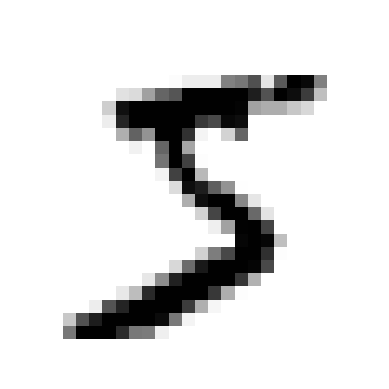

In [79]:
'''
this means there are 70000 images (or rows) and 784 features (or columns).
this is because each image is 28x28 pixels and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black)
'''
#Peeking at one digit from the dataset
#grab an instance's feature vector, reshape it to a 28x28 array, and display it using Matplotlib's imshow() function
#[feature1,feature2,....,feature784] --->one row/instance

import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [80]:
'''
We need to convert the array y to have data type np.uint8 (unsigned 8-bit integer) as y might initially be a string or object array 
(e.g., ['5', '0', '4', ...])
np.uint8 means:
- unsigned: no negative values
- 8-bit: can store integers from 0 to 255
- saves memory and is efficient for storage and computation
'''
import numpy as np
y=y.astype(np.uint8)

In [81]:
'''
you should always create a test set and set it aside before inspecting the data closely.
The MNIST data is actually already shuffled for us which is good because it guarantees that all cross-validation folds will be similar. Moreover,
some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row.
'''
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [82]:
'''
Let's simplify the problem for now
Let's try to identify only one digit- e.g. the number 5
^ makes a *Binary Classifier*

this means that the classifier will be capable of distinguishing b/w just two classes- 5 and not-5
'''
import pandas as pd
y_train_5=(y_train==5) # True for all 5s, False for all other digits
y_test_5=(y_test==5)
print(pd.DataFrame(y_train_5).head())

       0
0   True
1  False
2  False
3  False
4  False


In [83]:
'''
Let's pick a classifier and train it.
A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. 
This classifier
-has the advantage of being capable of handling very large datasets efficiently. 
-deals with training instances independently, one at a time, which also makes SGD well suited for online learning
-relies on randomness during training (hence,the name "stochastic")
-If you want reproducible results, oen should set the random_state parameter
'''
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [84]:
#Now, let's use it to detect images of the number 5
sgd_clf.predict([some_digit])

array([ True])

In [85]:
#The classifier guesses that this image represents a 5 (true). looks like it guessed right in this case!
#Now, let's evaluate our classifier
'''
Evaluating a classifier is often significantly trickier than evaluating a regressor, but we shall do it anyways.
A good way to evaluate a model is to use *cross-validation*.

Using StratifiedKFold (use when you want to implement cross-validation yourself; when you need more control over the cross validation
process than what Scikit-Learn provides off the shelf. It will roughly do the same thing as Scikit-Learn's cross_val_score() and prints the same result)

StratifiedKFold ensures that the class distribution in each fold is approximately the same as the original dataset.
This is particularly useful in classification problems where classes may be imbalanced.
'''
#Using StratifiedKFold

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
'''
n_splits refers to the number of folds (or splits) that the dataset will be divided into for cross-validation.

here, n_splits=3 means the dataset will be split into 3 subsets (or folds). That means the model will be trained and evaluated 3 times:
- Each time, it uses 2 folds for training and 1 fold for testing.
- It rotates the test fold each time, so every sample is tested once.
'''

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


In [86]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [87]:
'''
Wow, above 95% accuracy!

Now, let's look at a very dumb classifier that just classifies every single image in the "not-5" class:
'''
from sklearn.base import BaseEstimator

'''
BaseEstimator is a base class provided by scikit-learn that you can inherit from when writing your own custom models or transformers.

Purpose:
It provides two useful features:
- Automatic parameter handling: If you define __init__ with parameters, it stores them, and you get get_params() and set_params() for 
free (useful for hyperparameter tuning via GridSearchCV etc.).
- Better integration with the scikit-learn ecosystem (like pipelines, cross-validation, etc.).

However,
clone() is used to create a new, identical copy of an estimator with the same parameters but without any fitted data.

Purpose:
- Useful in cross-validation or ensemble methods where you need to retrain a fresh copy of the model multiple times.
- Ensures no data leakage from previous training.
'''

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

#Let's check it's accuracy
never5_clf=Never5Classifier()
cross_val_score(never5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [88]:
'''
Above 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess tha an image is not-5, you'll be 
right about 90% of the time.

This demonstrates why accuracy is generally NOT the preferred performance measure for classifiers, especially when you are dealing with 
skewed datasets( datasets where some classes are much more frequent than others)

A much better way to evaluate the performance of a classifier is to look at the *confusion matrix*. 
General Idea: to count the number of times instances of class A are classified as class B. E.g: to know the number of times the classifier confused
images of 5s with 3s, one would look in the fifth row and third column of the confusion matrix.
 
To compute the confusion matrix, you first need to have a set of predictions so that they can be compared to the actual targets. 
We could make predictions on the test set, but let’s keep it untouched for now, coz we want to use the test set only at the very end of 
our project, once we have a classifier that we are ready to launch. Instead, we can use cross_val_predict()
'''
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [89]:
'''
cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions 
made on each test fold. This means that we get a clean(meaning that the prediction is made by a model
that never saw the data during training) prediction for each instance in the training set.

Now we create a confusion matrix on target classes, y_train_5 and predicted classes, y_train_pred 
'''
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


In [90]:
'''
Each row in a confusion matrix represents an actual class, while each column represents a predicted class. 
the structure explanation is below:
negative  class (here: not-5 images) [[ no of images *correctly* classified (TRUE NEGATIVE), no of images *wrongly* classified (FALSE POSITIVE)],
positive class (here:5 images)        [no of images *wrongly* classified (FALSE NEGATIVE), no of images *correctly* classified (TRUE POSITIVE)]]

For perfect classifier it'll only show non-zero values in place of true positives and true negatives. Something like this:
'''
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
print(confusion_matrix(y_train_5, y_train_perfect_predictions))

[[54579     0]
 [    0  5421]]


In [91]:
'''
precision of the classifier:  the accuracy of the positive pre
dictions. <Out of all the predicted positives, how many were actually correct?>

Precision= TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)

 precision is typically used along with another metric named recall, also called sensitivity or the true positive rate
 (TPR): it is the ratio of positive instances that are correctly detected by the classifier
<Out of all actual positives, how many did we catch?>
 Recall= TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)
'''
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [92]:
'''
this means that the 5-detector is correct only 83.7% of the time and only detects 65.1% of the 5s

it is often convenient to combine precision and recall into a single metric, called "F1 Score", in particular, if you need a simple 
way to compare two classifiers.
F1-score: harmonic mean of precision and recall.

F1-score= 2 / ( (1/precision) + (1/recall) )

while the regular mean treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are *high*.

F1-score favors classifiers that have similar precision and recall.
'''
from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_train_pred))

0.7325171197343846


In [93]:
print(cm[1, 1] / (cm[0, 1] + cm[1, 1])) #precision
print(cm[1, 1] / (cm[1, 0] + cm[1, 1])) #recall
print(cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)) #f1-score

0.8370879772350012
0.6511713705958311
0.7325171197343847


In [94]:
'''
Precision/Recall trade-off:
- Increasing Precision often reduces Recall: Be more selective → fewer false positives → might miss real positives.
-Increasing Recall often reduces Precision: Be more lenient → catch more true positives → might include more false positives.

Real-World Analogy:
Spam Filter:
- High Precision: Only marks emails as spam if very sure → might miss some spam (low recall).
- High Recall: Marks anything that looks spammy → catches all spam but might flag real emails (low precision).

let's delve further into our classifier- SGDClassifier

 Scikit-Learn does not let one set the threshold directly, but it does give one access to the decision scores that it uses to make predictions. 
 We call its decision_function() method, that returns a score for each instance, and then use any threshold one wants to make predictions
 based on those scores
'''
y_scores=sgd_clf.decision_function([some_digit])
print(y_scores)

[2164.22030239]


In [95]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
print(y_some_digit_pred)

[ True]


In [96]:
#Since the threshold =0, the previous code returns the same result as predict() method
#Let's increase the threshold
threshold=8000
y_some_digit_pred=(y_scores>threshold)
print(y_some_digit_pred)

[False]


[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


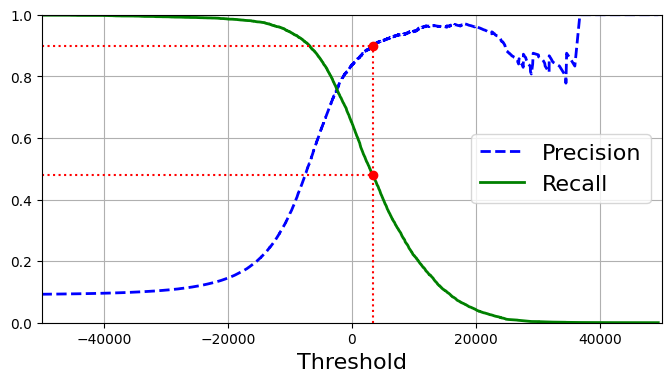

In [97]:
'''
This confirms that RAISING the threshold DECREASES the recall. The image actually represents a 5, and the classifier 
detects it when the threshold is 0, but it misses it when the threshold is increased to 8,000.

How do you decide which threshold to use? 

First, we use the cross_val_predict() function to get the scores of all instances in the training set, but this time we specify that
we want to return decision scores instead of predictions.

With these scores, we then use the precision_recall_curve() function to compute precision and recall for all possible thresholds

 Finally, we use Matplotlib to plot precision and recall as functions of the threshold value
'''
#1
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)
#2
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
#3
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.savefig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

True


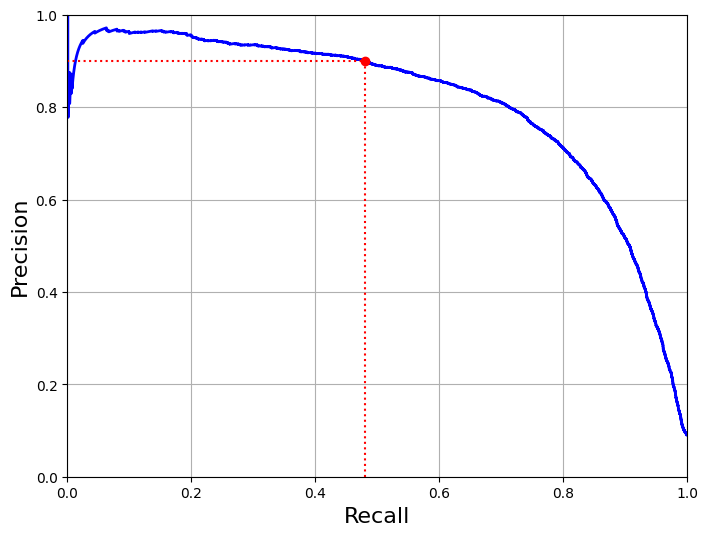

In [98]:
'''
the PRECISION curve seems bumpier than the RECALL curve. It is due to how each metric reacts to individual prediction changes.

Precision= TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)

Recall= TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)

RECALL only changes when a true positive or false negative is affected.
As the threshold increases, the model becomes stricter, so recall tends to decrease steadily (we’re missing more actual positives).
This change is usually gradual and smooth.

PRECISION is more sensitive to small changes, especially when:
- The number of predicted positives (TRUE POSITIVE + FALSE POSITIVE) is small.
- A single incorrect prediction (false positive) significantly changes the value.
So, when the threshold shifts and just a few predictions are reclassified, precision can jump up or down noticeably.


Another way to select a good precision/recall trade-off is to plot precision directly against recall
'''
print((y_train_pred == (y_scores > 0)).all())
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.savefig("precision_vs_recall_plot")
plt.show()

In [99]:
'''
we probably want to select precision/recall trade-off just before the *drop* of precision, but the choice depends from project to project
Once you choose a precision percentage (e.g. 90%), you look up the first plot and find the threshold value. To be more precise, you can 
search for the lowest threshold that gives you *atleast* the precision percentage you chose; with np.argmax() - it returns the first index
of the maximum value, which means the first True value.
'''
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

3370.0194991439557


In [100]:
y_train_pred_90=(y_scores>=threshold_90_precision) #To make predictions (on the training set for now), instead of calling the classifier’s predict() method
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


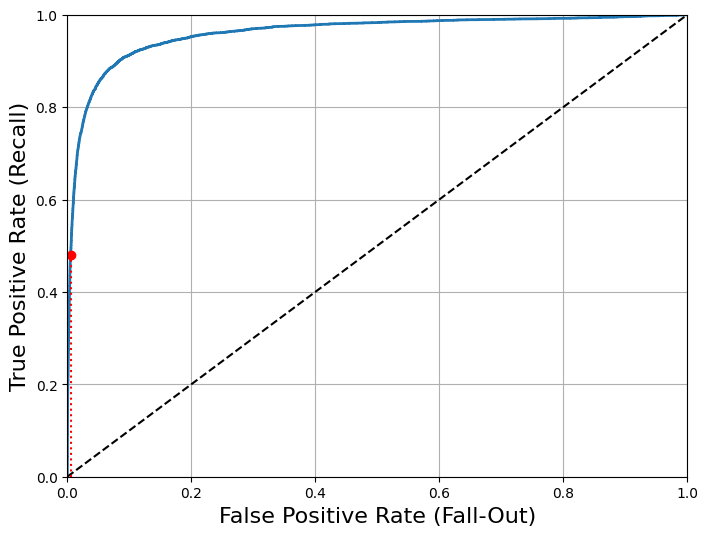

In [101]:
#A high-precision classifier is not very useful if its recall is too low.
'''
ROC CURVE (Receiver Operating Characteristic Curve)
plot of :
- True Negative Rate VS False Positive Rate (FPR: the ratio of negative instances that are incorrectly classified as positive)
or 
- Recall VS 1-True Negative Rate (TNR: ratio of negative instances that are correctly classified as negative)
or 
- Sensitivity VS 1-Specificity

Trade-off: the higher the recall (TPR), the more false positives (FPR) the classifier produces.

dotted line on the plot: represents the ROC curve of a purely random classifier; A GOOD CLASSIFIER STAYS AS FAR AWAY FROM THAT LINE AS POSSIBLE
'''
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

#plotting
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.savefig("roc_curve_plot")                                    # Not shown
plt.show()

In [102]:
'''
One way to compare classifiers is to measure the area under the curve (AUC). 
A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5

ROC and Precision-Recall (PR), which one to use and when? 
As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than
the false negatives. Otherwise, use the ROC curve. 

Here,  looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the top left corner)

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier.

The Random ForestClassifier class does not have a decision_function() method. Instead, it has a predict_proba() method. It returns an array 
containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class 
(e.g., 70% chance that the image represents a 5).

'''
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

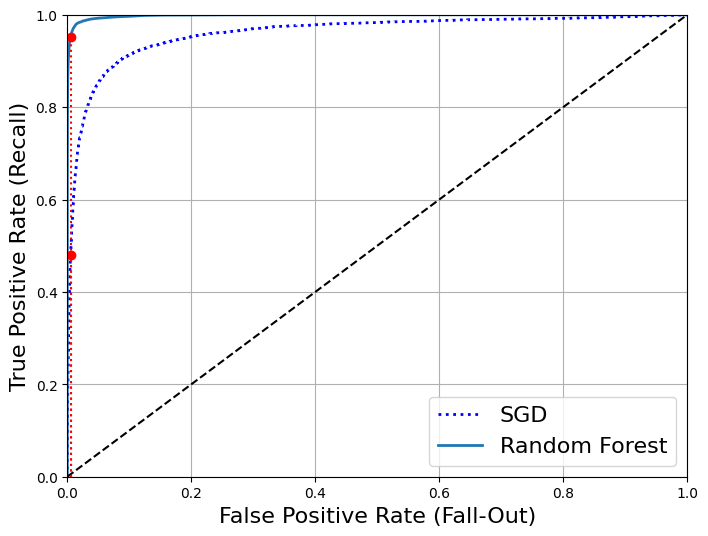

In [103]:
y_scores_forest=y_probas_forest[:,1] #score= proba of positive class
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.savefig("roc_curve_comparison_plot")
plt.show()

In [106]:
'''
ROC curve of RandomForestClassifier looks much better than the SGDClassifier's
'''
#ROC AUC SCORE OF RANDOMFORESTCLASSIFIER
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5,y_scores_forest))

0.9983436731328145


In [108]:
'''
Now we know how to train binary classifiers, choose the appropriate metric for our task, evaluate your classifiers using cross-validation, 
select the precision/recall trade off that fits your needs, and use ROC curves and ROC AUC scores to compare various models. 

Now let’s try to detect more than just the 5s. 

Multiclass Classification (Multinomial)

Goal: Classify into *more than 2 classes* (e.g., digits 0–9).
Some models like *SGD, Random Forest, Naive Bayes* handle this *natively*.
Others like *Logistic Regression, SVM* are *binary-only*, so we use strategies to extend them.

Strategies to Use Binary Classifiers for Multiclass:

One-vs-Rest (OvR)
* Train *1 classifier per class*: each one learns to distinguish *one class vs all others*.
* During prediction, we get *scores from all classifiers* and pick the one with the *highest score*.
* Example: 10 digits → 10 classifiers (0-vs-all, 1-vs-all...).
* Easy to implement, works well for most models.

One-vs-One (OvO)
* Train *1 classifier for every pair of classes*.
* So for N classes → N(N-1)/2 classifiers.
* MNIST (10 classes) → 45 classifiers (0-vs-1, 0-vs-2...9-vs-8).
* Each classifier is trained on *just 2 classes*, so training is *faster* for large datasets.
* Final prediction: every classifier votes → class with **most wins** wins.

Which to Use?
- Use **OvO** if your model (like SVM) is *slow with large datasets* → faster training per classifier.
- Use **OvR** for most other algorithms → fewer classifiers, simpler.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it 
automatically runs OvR or OvO, depending on the algorithm. 
'''
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict([some_digit])
print(y_pred)

'''
here, under the hood, Scikit-Learn actually used the OvO strategy: it trained 45 binary classifiers, got their
decision scores for the image, and selected the class that won the most duels.

If you call decision_function(), you'll see that it returns 10 scores (classes: 0 to 9) per instance instead of just 1. That's one score per class.
'''
some_digit_scores=svm_clf.decision_function([some_digit])
print(some_digit_scores)
print(np.argmax(some_digit_scores))
print(svm_clf.classes_)

[5]
[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
5
[0 1 2 3 4 5 6 7 8 9]


In [109]:
'''
If we can to force Scikit-Learn to use one-versus-one:
'''
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVC(gamma="auto", random_state=42))
'''
In the context of SVC (Support Vector Classifier) with an RBF kernel (default), gamma is a hyperparameter that controls how far 
the influence of a single training example reaches.

gamma="auto": gamma = 1 / n_features
It sets gamma to the reciprocal of the number of input features. So if your input has 4 features → gamma = 1/4 = 0.25.

- A small gamma (like with "auto") means the model sees farther — more generalized decision boundary.
- A large gamma (like with "scale") focuses on nearby points — can lead to overfitting.

Tip: "scale" is usually preferred over "auto" (since sklearn 0.22): gamma = 1 / (n_features * X.var())
"scale" adapts gamma based on data variance, so it’s usually more robust.

But lets follow the textbook link and go with gamma=auto for now
'''
ovo_clf.fit(X_train[:1000], y_train[:1000])
ovo_y_pred= ovo_clf.predict([some_digit])
print(ovo_y_pred)

print(len(ovo_clf.estimators_))

[5]
45


In [111]:
'''
If we can to force Scikit-Learn to use one-versus-rest:
'''
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_y_pred=ovr_clf.predict([some_digit])
print(ovr_y_pred)

print(len(ovr_clf.estimators_))

[5]
10


In [112]:
'''
Let's train a multinomial classifier: SGDClassifier

This time Scikit-Learn will not have to run OvR or OvO because SGD classifiers can directly classify instances into multiple classes. 
The decision_function() method now returns one value per class.
'''
sgd_clf.fit(X_train, y_train)
sgd_y_pred= sgd_clf.predict([some_digit])
print(sgd_y_pred)
print(sgd_clf.decision_function([some_digit]))

[3]
[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


In [113]:
'''
it is fairly confident aobut its prediction: almost all the scores are largely negative except class 3.
'''
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [114]:
'''
Simply Scaling the inputs increases accuracy above 89%
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
'''
X_train.astype(np.float64)
- Converts the X_train data to 64-bit floating point numbers.
- Ensures precision and avoids errors if the data was in another type (like int or uint8 from images).

Why use np.float64?
Some ML models (like SVMs) expect float64 precision, especially when working with datasets like images (uint8). 
It prevents errors and improves numerical stability.
'''
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [115]:
#Error Analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


In [116]:
'''
better visualization of confusion matrix from: sklearn.metrics.plot_confusion_matrix() or Matplotlib's matshow()
'''
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

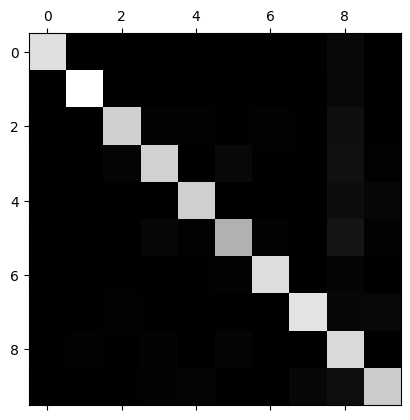

In [119]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_plot")
plt.show()

In [121]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums

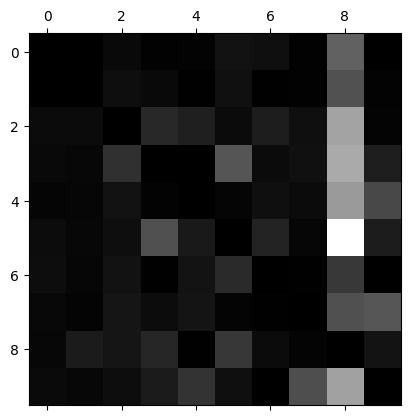

In [122]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_errors_plot")
plt.show()

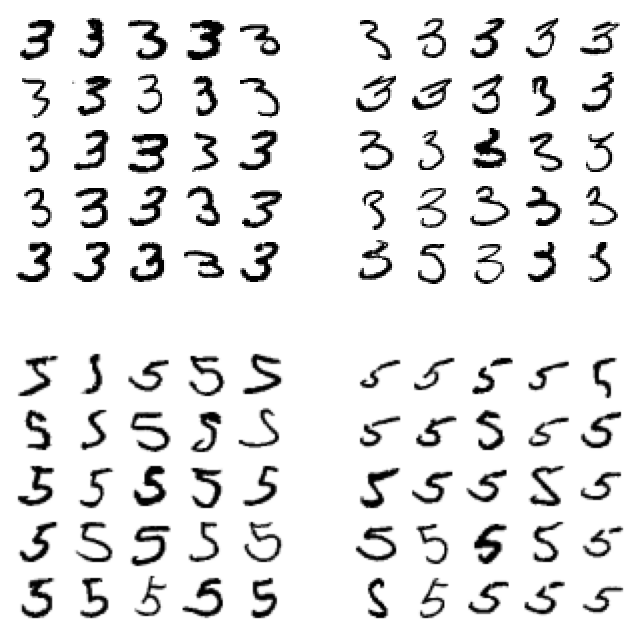

In [125]:
'''
Confusion Matrix Insights:
- Rows = actual classes, columns = predicted classes
- Bright column for class 8 → many digits misclassified as 8.
- But row for 8 is okay → real 8s are usually classified correctly.
- Matrix isn’t symmetrical — e.g., 3s and 5s are often confused with each other.

How to Improve:
- Focus on reducing false 8s.
- Get more training data for digits that look like 8.
- Engineer features (e.g., count closed loops: 8=2, 6=1, 5=0).
- Use image preprocessing (e.g., OpenCV, Scikit-Image) to highlight key patterns.

Manually analyzing misclassified images (like 3s vs 5s) can help, though it’s time-consuming.
Use tools like plot_digits() to visualize such errors.
'''

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

def plot_digits(instances, images_per_row=10, **options): #not there in the chapter nor its jupyter notebook
    size = 28  # Image size for MNIST
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    
    padded = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.swapaxes(1, 2).reshape((size * n_rows, size * images_per_row))
    
    plt.imshow(big_image, cmap="binary", **options)
    plt.axis("off")
'''
What it does:
- Takes a list of flattened images (like shape (n_samples, 784)).
- Converts them into a grid of 28×28 images.
- Uses imshow() to draw them in a single big image for easy viewing.
'''

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.savefig("error_analysis_digits_plot")
plt.show()

In [126]:
#Multilabel Classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [127]:
'''
The above code creates a y_multilabel array containing two target labels for each digit image: the first indicates whether or not the digit is large 
(7, 8, or 9), and the second indicates whether or not it is odd. 
The next lines create a KNeighborsClassifier instance (which supports multilabel classification, though not all classifiers do), and
we train it using the multiple targets array. Now we make a prediction, and notice that it outputs two labels:
'''
knn_clf.predict([some_digit])

array([[False,  True]])

In [128]:
'''
Correct Prediction! The digit 5 is indeed not larger than 7 but is odd.
There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. 
One approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply
compute the average score.
'''
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

'''
Macro Average F1 Score
- It calculates the F1 score independently for each class, and then
- Takes the average of those F1 scores, giving equal weight to each class (regardless of how many instances belong to each class).
- Use case: Use "macro" when you care equally about all classes, especially in imbalanced datasets where some labels appear much less often than others.

Difference from "micro":
- "micro" averages over all individual predictions, so common classes dominate the score.
- "macro" treats all classes equally, even the rare ones.
'''

0.976410265560605


'\nMacro Average F1 Score\n- It calculates the F1 score independently for each class, and then\n- Takes the average of those F1 scores, giving equal weight to each class (regardless of how many instances belong to each class).\n- Use case: Use "macro" when you care equally about all classes, especially in imbalanced datasets where some labels appear much less often than others.\n\nDifference from "micro":\n- "micro" averages over all individual predictions, so common classes dominate the score.\n- "macro" treats all classes equally, even the rare ones.\n'

In [130]:
'''
This assumes that all labels are equally important, however, which may not be the case.
One simple option is to give each label a weight equal to its *support* (i.e., the number of instances with that target label). 
To do this, simply set average="weighted" in the preceding code.
'''
print(f1_score(y_multilabel, y_train_knn_pred, average="weighted"))

0.9778357403921755


In [131]:
'''
Multioutput Classification or Multioutput-Multiclass Classification

It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

Example: Image Denoising
- Build a system to remove noise from digit images.
- Input: noisy image, Output: clean image (pixel intensity array like MNIST).
- Each pixel is a label, and each label can take multiple values (0–255) → multilabel & multioutput.
- Technically closer to regression (predicting pixel intensities), but still treated as classification in some contexts.
- Multioutput systems can mix classification + regression (e.g., class labels + value labels predictions).

Dataset: Use MNIST, add noise with np.random.randint(), and target = original clean image.
'''
noise = np.random.randint(0, 100, (len(X_train), 784))
'''
This line generates random noise to be added to images in your dataset.

(0,100) 
→ generates random integers from 0 (inclusive) to 100 (exclusive) → i.e., 0 to 99.

(len(X_train), 784)
→ Shape of the array:
- len(X_train) = number of training images
- 784 = number of pixels per image (since each MNIST image is 28×28 = 784 pixels)

So the output is a 2D NumPy array of shape (number_of_images, 784), filled with random noise pixel values.
'''
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
'''
This line generates random noise to be added to images in your dataset.

(0,100) 
→ generates random integers from 0 (inclusive) to 100 (exclusive) → i.e., 0 to 99.

(len(X_train), 784)
→ Shape of the array:
- len(X_train) = number of test images
- 784 = number of pixels per image (since each MNIST image is 28×28 = 784 pixels)

So the output is a 2D NumPy array of shape (number_of_images, 784), filled with random noise pixel values.
'''
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


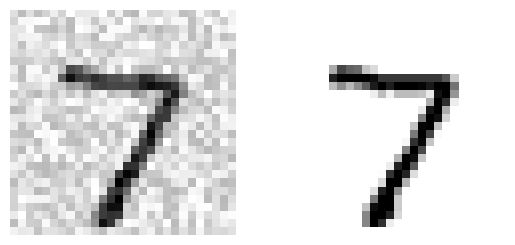

In [133]:
#Let's take a peek at an image from the test set.
some_index = 0

def plot_digit(data):
    image = data.reshape(28, 28)  # Reshape 784 vector to 28x28 image
    plt.imshow(image, cmap="binary")  # Display in grayscale
    plt.axis("off")  # Hide axes

plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.savefig("noisy_digit_example_plot")
plt.show()

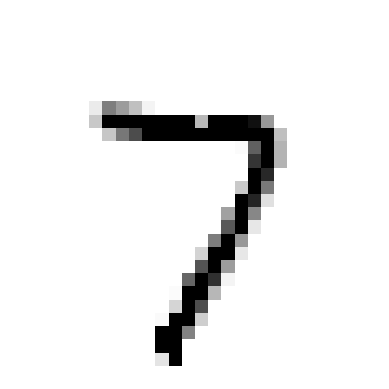

In [134]:
#Let's train the classifier and make the left image a clean one
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [ ]:
'''
Looks close enough to the target :>
We're now done with our tour of classification. We now know how to select good metrics from classification tasks, pick the appropriate PR trade-off,
compare classif